In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('data_assignment.csv')

In [3]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [4]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [5]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data.shape

(8523, 12)

In [7]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [8]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [9]:
data['Item_Identifier'].apply(lambda x : str(x)[:2]).value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [10]:
data['Item_Identifier_code'] = data['Item_Identifier'].apply(lambda x : str(x)[:2])

In [11]:
data[['Item_Identifier_code','Item_Type' ]]

Item_Identifier_code              Item_Type
0                      FD                  Dairy
1                      DR            Soft Drinks
2                      FD                   Meat
3                      FD  Fruits and Vegetables
4                      NC              Household
...                   ...                    ...
8518                   FD            Snack Foods
8519                   FD           Baking Goods
8520                   NC     Health and Hygiene
8521                   FD            Snack Foods
8522                   DR            Soft Drinks

[8523 rows x 2 columns]

In [12]:
data.groupby('Item_Identifier_code')['Item_Type'].value_counts()

Item_Identifier_code  Item_Type            
DR                    Soft Drinks               445
                      Hard Drinks               214
                      Dairy                     140
FD                    Fruits and Vegetables    1232
                      Snack Foods              1200
                      Frozen Foods              856
                      Canned                    649
                      Baking Goods              648
                      Dairy                     542
                      Meat                      425
                      Breads                    251
                      Starchy Foods             148
                      Breakfast                 110
                      Seafood                    64
NC                    Household                 910
                      Health and Hygiene        520
                      Others                    169
Name: Item_Type, dtype: int64

In [13]:
data.groupby(['Item_Identifier','Item_Type'])['Item_Weight'].mean().reset_index().head(25)

Item_Identifier    Item_Type  Item_Weight
0            DRA12  Soft Drinks       11.600
1            DRA24  Soft Drinks       19.350
2            DRA59  Soft Drinks        8.270
3            DRB01  Soft Drinks        7.390
4            DRB13  Soft Drinks        6.115
5            DRB24  Soft Drinks        8.785
6            DRB25  Soft Drinks       12.300
7            DRB48  Soft Drinks       16.750
8            DRC01  Soft Drinks        5.920
9            DRC12  Soft Drinks       17.850
10           DRC13  Soft Drinks        8.260
11           DRC24  Soft Drinks       17.850
12           DRC25  Soft Drinks        5.730
13           DRC27        Dairy       13.800
14           DRC36  Soft Drinks       13.000
15           DRC49  Soft Drinks        8.670
16           DRD01  Soft Drinks       12.100
17           DRD12  Soft Drinks        6.960
18           DRD13  Soft Drinks       15.000
19           DRD15        Dairy       10.600
20           DRD24  Soft Drinks       13.850
21           DRD25  Soft Drinks        6.135
22           DRD27        Dairy       18.750
23           DRD37  Soft Drinks        9.800
24           DRD49  Soft Drinks        9.895

<AxesSubplot:>

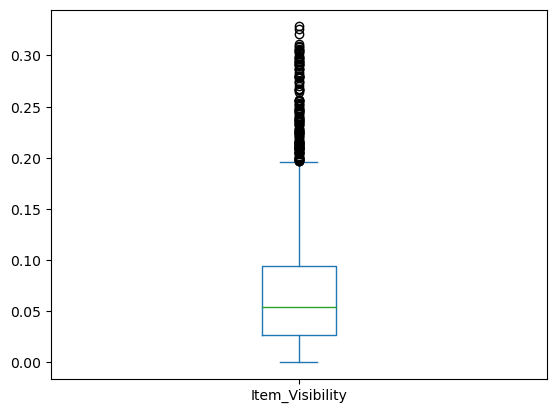

In [14]:
data.drop(columns=['Item_Weight','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']).plot(kind = 'box')


In [15]:
data['Item_Weight'] = data.groupby(['Item_Identifier_code','Item_Type']).Item_Weight.transform(lambda x: x.fillna(x.mean())
                                                                   )

In [16]:
data['Item_Weight'].isna().sum()

0

In [17]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_Identifier_code  
0  Supermarket Type1          3735.1380                   FD  
1  Supermarket Type2           443.4228                   DR  
2  Supermarket Type1          2097.2700                   FD  
3      Grocery Store           732.3800                   FD  
4  Supermarket Type1           994.7052                   NC

In [18]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat' : 'Low Fat'}, inplace = True)


In [20]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:ylabel='Frequency'>

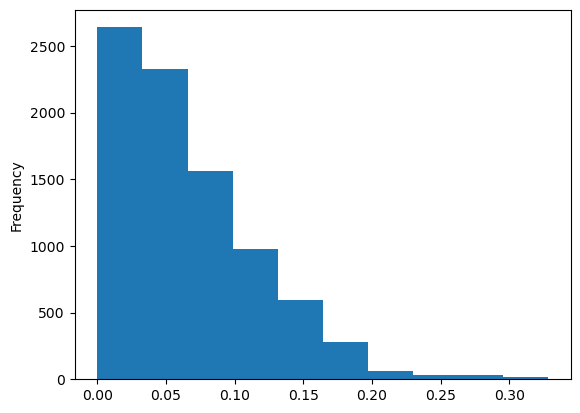

In [21]:
data['Item_Visibility'].plot(kind = 'hist')

In [22]:
data[data['Item_Visibility']==0.0].Item_Type.value_counts()


Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Breads                   17
Hard Drinks              17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: Item_Type, dtype: int64

In [23]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [24]:
data['Outlet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [25]:
del  data['Outlet_Establishment_Year']

In [26]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier Outlet_Size  \
0                     Dairy  249.8092            OUT049      Medium   
1               Soft Drinks   48.2692            OUT018      Medium   
2                      Meat  141.6180            OUT049      Medium   
3     Fruits and Vegetables  182.0950            OUT010         NaN   
4                 Household   53.8614            OUT013        High   
...                     ...       ...               ...         ...   
8518            Snack Foods  214.5218            OUT013        High   
8519           Baking Goods  108.1570            OUT045         NaN   
8520     Health and Hygiene   85.1224            OUT035       Small   
8521            Snack Foods  103.1332            OUT018      Medium   
8522            Soft Drinks   75.4670            OUT046       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0                  Tier 1  Supermarket Type1          3735.1380   
1                  Tier 3  Supermarket Type2           443.4228   
2                  Tier 1  Supermarket Type1          2097.2700   
3                  Tier 3      Grocery Store           732.3800   
4                  Tier 3  Supermarket Type1           994.7052   
...                   ...                ...                ...   
8518               Tier 3  Supermarket Type1          2778.3834   
8519               Tier 2  Supermarket Type1           549.2850   
8520               Tier 2  Supermarket Type1          1193.1136   
8521               Tier 3  Supermarket Type2          1845.5976   
8522               Tier 1  Supermarket Type1           765.6700   

     Item_Identifier_code  Outlet_Age  
0                      FD          24  
1                      DR          14  
2                      FD          24  
3                      FD          25  
4                      NC          36  
...                   ...         ...  
8518                   FD          36  
8519                   FD          21  
8520                   NC          19  
8521                   FD          14  
8522                   DR          26  

[8523 rows x 13 columns]

In [27]:
data['Outlet_Size'].isna().sum()

2410

In [28]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [29]:
data['Outlet_Size'] = data.groupby(['Outlet_Type']).Outlet_Size.transform(lambda x: x.fillna(x.mode()[0]))


In [30]:
data.isna().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Identifier_code    0
Outlet_Age              0
dtype: int64

In [31]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [32]:
!pip install pandas-profiling

In [33]:
import pandas_profiling as pp

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_2024/1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [34]:
pp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
data['Outlet_Identifier'].nunique()

10

In [36]:
data.select_dtypes(exclude = np.number)

Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0               OUT049      Medium               Tier 1  Supermarket Type1   
1               OUT018      Medium               Tier 3  Supermarket Type2   
2               OUT049      Medium               Tier 1  Supermarket Type1   
3               OUT010       Small               Tier 3      Grocery Store   
4               OUT013        High               Tier 3  Supermarket Type1   
...                ...         ...                  ...                ...   
8518            OUT013        High               Tier 3  Supermarket Type1   
8519            OUT045       Small               Tier 2  Supermarket Type1   
8520            OUT035       Small               Tier 2  Supermarket Type1   
8521            OUT018      Medium               Tier 3  Supermarket Type2   
8522            OUT046       Small               Tier 1  Supermarket Type1   

     Item_Identifier_code  
0                      FD  
1                      DR  
2                      FD  
3                      FD  
4                      NC  
...                   ...  
8518                   FD  
8519                   FD  
8520                   NC  
8521                   FD  
8522                   DR  

[8523 rows x 8 columns]

In [37]:
# Please complete this

1. Drop the Item identifier
2. convert all other categorical data to one hot
3. concat the numerical data and one hoted categorical data
4. split train and test
5. build the model on train
6. predict the train
7. find the train error
8. predict on test
9. find the test error
10. compare the train and test error

In [40]:
data.corr()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Weight           1.000000        -0.011781  0.025671           0.011952   
Item_Visibility      -0.011781         1.000000 -0.001315          -0.128625   
Item_MRP              0.025671        -0.001315  1.000000           0.567574   
Item_Outlet_Sales     0.011952        -0.128625  0.567574           1.000000   
Outlet_Age            0.008329         0.074834 -0.005020           0.049135   

                   Outlet_Age  
Item_Weight          0.008329  
Item_Visibility      0.074834  
Item_MRP            -0.005020  
Item_Outlet_Sales    0.049135  
Outlet_Age           1.000000

In [49]:
plt.figure(figsize= (100,100),)
sns.heatmap(data.corr(), annot=True,annot_kws={"size": 200} )
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

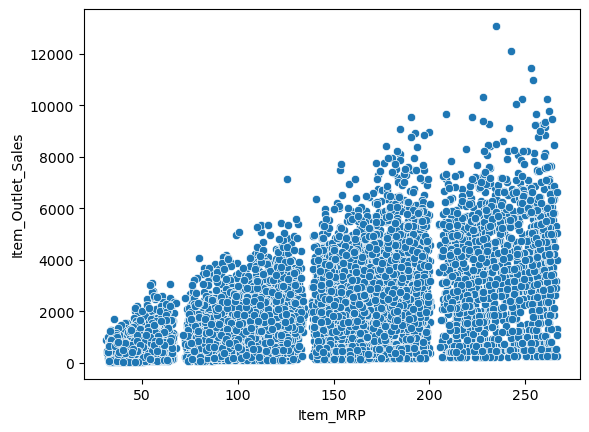

In [50]:
sns.scatterplot(x = data['Item_MRP'], y=data['Item_Outlet_Sales'])

In [51]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier Outlet_Size  \
0                     Dairy  249.8092            OUT049      Medium   
1               Soft Drinks   48.2692            OUT018      Medium   
2                      Meat  141.6180            OUT049      Medium   
3     Fruits and Vegetables  182.0950            OUT010       Small   
4                 Household   53.8614            OUT013        High   
...                     ...       ...               ...         ...   
8518            Snack Foods  214.5218            OUT013        High   
8519           Baking Goods  108.1570            OUT045       Small   
8520     Health and Hygiene   85.1224            OUT035       Small   
8521            Snack Foods  103.1332            OUT018      Medium   
8522            Soft Drinks   75.4670            OUT046       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0                  Tier 1  Supermarket Type1          3735.1380   
1                  Tier 3  Supermarket Type2           443.4228   
2                  Tier 1  Supermarket Type1          2097.2700   
3                  Tier 3      Grocery Store           732.3800   
4                  Tier 3  Supermarket Type1           994.7052   
...                   ...                ...                ...   
8518               Tier 3  Supermarket Type1          2778.3834   
8519               Tier 2  Supermarket Type1           549.2850   
8520               Tier 2  Supermarket Type1          1193.1136   
8521               Tier 3  Supermarket Type2          1845.5976   
8522               Tier 1  Supermarket Type1           765.6700   

     Item_Identifier_code  Outlet_Age  
0                      FD          24  
1                      DR          14  
2                      FD          24  
3                      FD          25  
4                      NC          36  
...                   ...         ...  
8518                   FD          36  
8519                   FD          21  
8520                   NC          19  
8521                   FD          14  
8522                   DR          26  

[8523 rows x 13 columns]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Item_Identifier_code  8523 non-null   object 
 12  Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 865.7+ KB


In [54]:
data['Item_Identifier_code'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier_code, dtype: int64

In [55]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [56]:
data.select_dtypes(exclude = np.number)

Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0               OUT049      Medium               Tier 1  Supermarket Type1   
1               OUT018      Medium               Tier 3  Supermarket Type2   
2               OUT049      Medium               Tier 1  Supermarket Type1   
3               OUT010       Small               Tier 3      Grocery Store   
4               OUT013        High               Tier 3  Supermarket Type1   
...                ...         ...                  ...                ...   
8518            OUT013        High               Tier 3  Supermarket Type1   
8519            OUT045       Small               Tier 2  Supermarket Type1   
8520            OUT035       Small               Tier 2  Supermarket Type1   
8521            OUT018      Medium               Tier 3  Supermarket Type2   
8522            OUT046       Small               Tier 1  Supermarket Type1   

     Item_Identifier_code  
0                      FD  
1                      DR  
2                      FD  
3                      FD  
4                      NC  
...                   ...  
8518                   FD  
8519                   FD  
8520                   NC  
8521                   FD  
8522                   DR  

[8523 rows x 8 columns]

In [62]:
data.select_dtypes(exclude = np.number).apply(lambda x: x.nunique(), axis = 0)

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Identifier_code       3
dtype: int64

In [63]:
8000/1559 # ~ Possibility of NA is higher if you do groupby transform

5.131494547787043

In [64]:
8000/3

2666.6666666666665

In [66]:
data.select_dtypes(exclude = np.number).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Identifier_code'],
      dtype='object')

In [68]:
data_one_hot = pd.get_dummies(data[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Identifier_code']])

In [70]:
data.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [72]:
scale = StandardScaler()

In [76]:
data_scale_numerical = pd.DataFrame(scale.fit_transform(data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Age']])
            ,columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Age'])

In [100]:
data_numerical = data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Age']]

In [77]:
data_one_hot

Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                            1                         0   
1                            0                         1   
2                            1                         0   
3                            0                         1   
4                            1                         0   
...                        ...                       ...   
8518                         1                         0   
8519                         0                         1   
8520                         1                         0   
8521                         0                         1   
8522                         1                         0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                          0                 0                    0   
1                          0                 0                    0   
2                          0                 0                    0   
3                          0                 0                    0   
4                          0                 0                    0   
...                      ...               ...                  ...   
8518                       0                 0                    0   
8519                       1                 0                    0   
8520                       0                 0                    0   
8521                       0                 0                    0   
8522                       0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       0   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  ...  \
0                                   0                      0  ...   
1                                   0                      0  ...   
2                                   0                      0  ...   
3                                   1                      0  ...   
4                                   0                      0  ...   
...                               ...                    ...  ...   
8518                                0                      0  ...   
8519                                0                      0  ...   
8520                                0                      0  ...   
8521                                0                      0  ...   
8522                                0                      0  ...   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                               1                            0   
1                               0                            0   
2                               1                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
8518                            0                            0   
8519                            0                            1   
8520                            0                            1   
8521                            0                            0   
8522                            1                            0   

     

In [81]:
data_one_hot = data_one_hot.reset_index().drop(columns = 'index')
data_scale_numerical  = data_scale_numerical.reset_index().drop(columns = 'index')


In [128]:
X = pd.concat([data_numerical,data_one_hot], axis = 1)
X_scaled = pd.concat([data_scale_numerical,data_one_hot], axis = 1)

In [102]:
y = data['Item_Outlet_Sales']

In [103]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=90)

In [129]:
train_scaled_X, test_scaled_X, train_scaled_y, test_scaled_y = train_test_split(X_scaled,y, test_size=0.3, random_state=90)


In [104]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((5966, 45), (2557, 45), (5966,), (2557,))

In [130]:
train_scaled_X.shape, test_scaled_X.shape, train_scaled_y.shape, test_scaled_y.shape

((5966, 45), (2557, 45), (5966,), (2557,))

# Modelling 

In [153]:
model = LinearRegression()

In [155]:
model.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [156]:
model.fit(train_X, train_y)

LinearRegression()

In [157]:
model.coef_

array([  -3.43546384, -576.77695171,   15.88130685,   16.20882644,
        -20.47644938,   20.47644938,   26.74475095,   73.11947559,
         81.74257521,   38.20843355,  -89.13731241,   64.94032285,
         56.72089294, -235.29433992,   22.75407336,  -21.91112637,
         17.39880497,  -46.36298506,   64.87078398,   26.91235907,
       -172.22433623,   91.51762753, -454.05729707,  -89.14378437,
        158.3147503 ,  -61.83321902, -419.7346757 ,  568.30198346,
        162.87715687,  -67.35032124,  360.28493003, -157.65952326,
        -89.14378437,  348.80924118, -259.66545681, -217.10926893,
        253.84158593,  -36.732317  , -873.79197277,  367.32320833,
        -61.83321902,  568.30198346,  132.52080127,  -87.00076319,
        -45.52003807])

In [108]:
model.intercept_

-499.7374443759577

<AxesSubplot:>

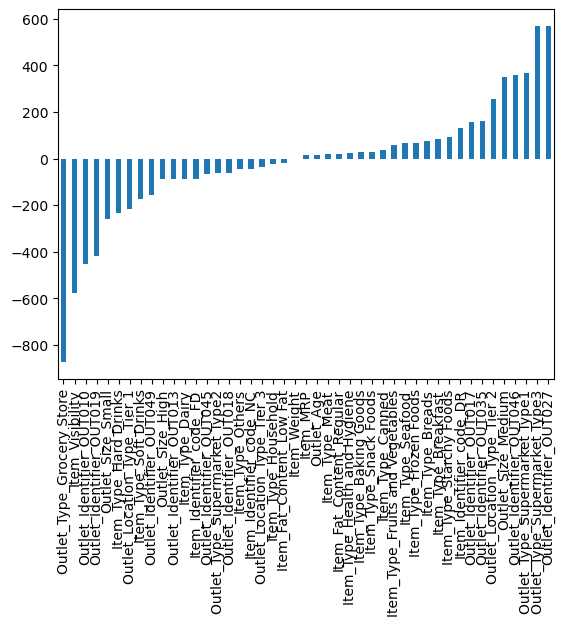

In [120]:
pd.Series(model.coef_, index=train_X.columns).sort_values().plot(kind = 'bar')


In [115]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending = False)

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

In [116]:
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False)

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

In [123]:
train_predict = model.predict(train_X)

In [125]:
test_predict = model.predict(test_X)

In [126]:
#Train Error
np.sqrt(mean_squared_error(train_y, train_predict))

1120.3769778195758

In [127]:
#Test Error
np.sqrt(mean_squared_error(test_y, test_predict))

1147.3178634338433

In [ ]:
train_scaled_X.shape, test_scaled_X.shape, train_scaled_y.shape, test_scaled_y.shape

In [105]:
model = LinearRegression()

In [131]:
model.fit(train_scaled_X, train_scaled_y)

LinearRegression()

In [132]:
model.coef_

array([-1.45409520e+01, -2.98487688e+01,  9.88710941e+02,  2.05662091e+13,
       -3.99648145e+14, -3.99648145e+14, -5.12069241e+13, -5.12069241e+13,
       -5.12069241e+13, -5.12069241e+13, -5.12069241e+13, -5.12069241e+13,
       -5.12069241e+13, -5.12069241e+13, -4.22474886e+14, -4.22474886e+14,
       -5.12069241e+13, -4.22474886e+14, -5.12069241e+13, -5.12069241e+13,
       -5.12069241e+13, -5.12069241e+13,  8.45505501e+13,  3.57067689e+13,
        3.01224033e+13, -2.86464587e+13,  2.06350494e+13,  2.64227229e+14,
        2.27521198e+13,  1.78385975e+13,  3.01953641e+13,  7.47113464e+13,
        1.12578383e+13, -3.02432110e+13,  9.35924902e+12, -2.90520112e+12,
        2.17353712e+13, -3.48828068e+13,  2.64606356e+13,  4.63814548e+13,
        2.06284477e+14, -1.45551478e+14, -1.57575543e+15, -1.57575543e+15,
       -1.20448746e+15])

In [135]:
model.intercept_

1941535930162494.2

<AxesSubplot:>

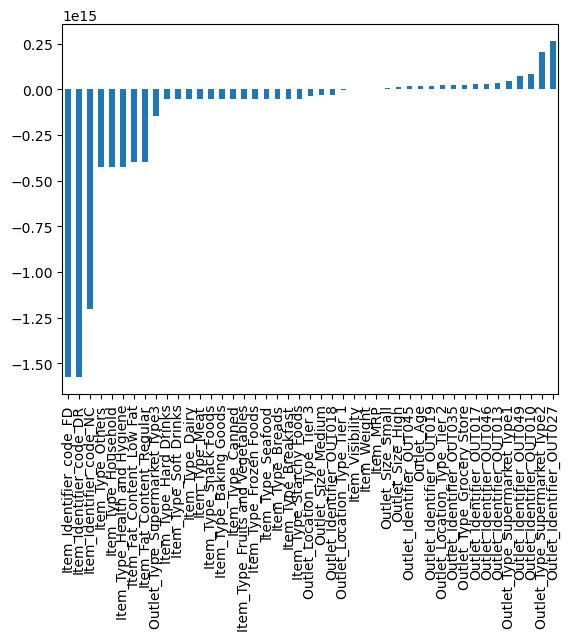

In [136]:
pd.Series(model.coef_, index=train_X.columns).sort_values().plot(kind = 'bar')


In [137]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending = False)

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

In [138]:
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending = False)

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

In [139]:
train_predict_scaled = model.predict(train_scaled_X)

In [140]:
test_predict_scaled = model.predict(test_scaled_X)

In [141]:
#Train Error
np.sqrt(mean_squared_error(train_scaled_y, train_predict_scaled))

1120.3784271177399

In [142]:
#Test Error
np.sqrt(mean_squared_error(test_scaled_y, test_predict_scaled))

1147.2986602993483

In [145]:
a = 0 # initialising 

In [146]:
a = 8

In [147]:
b = 5

In [148]:
a+b

13

In [149]:
b = 6
a+b

14

In [152]:
a = 0
b =5
a = a+b
a

5

In [159]:
res

NameError: name 'res' is not defined